# $\text{Exact diagonalization of the } \phi \text{ Hamiltonian} - E \text{ } vs \text{ } E_J$

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# Qubit parameters

phi_ext_value=np.pi

# Qubit parameters 1

E_J_value=1.0
E_Cj=1.0
E_L=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

#Qubit parameters 2

E_J_2_value=(1.0/5.0)
E_Cj_2=1.0
E_L_2=(1.0/16)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

#For E_J calculations

E_J=np.arange(0,1.2,0.2)#1.2
EnergiesEJ=[]
E_J_2=np.arange(0,0.41,0.05)#0.41
Energies2EJ=[]

#For phi_ext calculations

a=np.pi-0.6
b=np.pi+0.61
phi_ext=np.arange(a,b,0.6)
#phi_ext=np.arange(a,b,0.01)
Energiesphi=[]
Energies2phi=[]

In [4]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECJ,EL,phi,alph):
    #Initial
    H=np.zeros((N+1,N+1))   #,dtype=complex
    H_phi=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    #Interaction Hamiltonian construction
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=2*EJ*cos_phi.real #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
    H+=H_phi-H_I  #.astype(complex)
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [5]:
#Calculation 1

for EJ1 in E_J:
    print("Step for EJ = ",EJ1)
    H_0pi=Hamiltonian_0pi(EJ1,E_Cj,E_L,phi_ext_value,alpha)
    print(H_0pi)
    print("Hamiltonian built, len(H)=",len(H_0pi)**2)
    vals, _ = eigsh(H_0pi, k=12, which='SA')
    print("1st and 2nd degenerated vals are",vals[0], vals[1],"3rd and 4th degenerated vals", vals[2], vals[3])
    print("Eigenvalues calculated")
    #vals,vects=np.linalg.eigh(H)
    EnergiesEJ.append(vals) #-vals[0]

Step for EJ =  0.0
[[  1.   0.   0. ...   0.   0.   0.]
 [  0.   3.   0. ...   0.   0.   0.]
 [  0.   0.   5. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  97.   0.   0.]
 [  0.   0.   0. ...   0.  99.   0.]
 [  0.   0.   0. ...   0.   0. 101.]]
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.9999999999999893 3.000000000000003 3rd and 4th degenerated vals 4.999999999999986 7.000000000000006
Eigenvalues calculated
Step for EJ =  0.2
[[ 1.00000000e+00 -2.42612264e-01  3.03557626e-17 ...  2.90581275e-42
  -9.83336795e-33 -5.79495363e-43]
 [-2.42612264e-01  3.00000000e+00 -1.71552777e-01 ...  3.23638009e-30
   1.61901186e-41 -6.95324116e-32]
 [-6.32627051e-18 -1.71552777e-01  5.00000000e+00 ... -3.52449951e-41
   1.56785554e-29  7.71569057e-41]
 ...
 [ 2.86594233e-42  3.23638009e-30 -1.63928363e-41 ...  9.70000000e+01
   3.89001131e-02  8.79252526e-20]
 [-9.83336795e-33  1.62768718e-41  1.56785554e-29 ...  3.89001131e-02
   9.90000000e+01  1.91527435e-02]
 [-5.83019547e

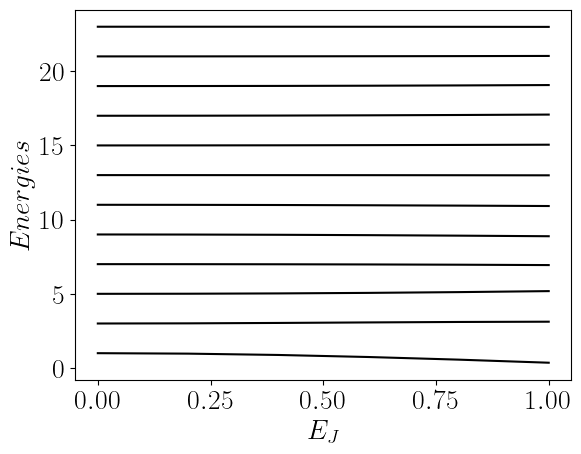

In [6]:
#Plot 1

plt.plot(E_J,EnergiesEJ,c="k")
#plt.ylim(0,11)
#plt.ylim(1.7,4.2)
#plt.xlim(-0.05,0.4)
plt.xlabel('$E_J$')
plt.ylabel('$Energies$')
#plt.savefig('PHI_Energies_vs_EJ_N1000_k12.pdf')
plt.show()

In [7]:
for phi1 in phi_ext:
    print("Step for phi_ext = ",phi1)
    H=Hamiltonian_0pi(E_J_value,E_Cj,E_L,phi1,alpha)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    valsphi, _ = eigsh(H, k=4, which='SA')
    print(valsphi[0],valsphi[1],valsphi[2],valsphi[3])
    print("Eigenvalues calculated")
    Energiesphi.append(valsphi)

Step for phi_ext =  2.541592653589793
Hamiltonian built, len(H)= 2601
0.11605047564339292 3.0170434154466728 5.338398050818218 7.1990847540398315
Eigenvalues calculated
Step for phi_ext =  3.141592653589793
Hamiltonian built, len(H)= 2601
0.3572719451696364 3.121530778969982 5.182354464176998 6.93735911718353
Eigenvalues calculated
Step for phi_ext =  3.741592653589793
Hamiltonian built, len(H)= 2601
0.6426280361493073 3.2081304226301124 4.959575475506296 6.713055736479108
Eigenvalues calculated


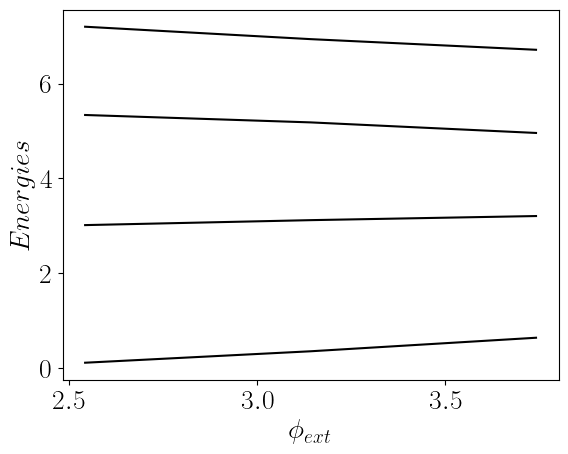

In [8]:
#Plot 1 

plt.plot(phi_ext,Energiesphi,c="k")
#plt.ylim(0.7,4.1)
plt.xlabel('$\phi_{ext}$')
plt.ylabel('$Energies$')
#plt.savefig('PHI_Energies_vs_phiext_N2000_INTNO2.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [9]:
#Calculation 2

for EJ2 in E_J_2:
    print("Step for EJ = ",EJ2)
    H_0pi_2=Hamiltonian_0pi(EJ2,E_Cj_2,E_L_2,phi_ext_value,alpha2)
    print("Hamiltonian built, len(H)=",len(H_0pi_2)**2)
    vals2, _ = eigsh(H_0pi_2, k=12, which='SA')
    print("1st and 2nd degenerated vals are",vals2[0], vals2[1],"3rd and 4th degenerated vals", vals2[2], vals2[3])
    print("Eigenvalues calculated")
    #vals2,vects2=np.linalg.eigh(H2)
    Energies2EJ.append(vals2)

Step for EJ =  0.0
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.2500000000000003 0.7500000000000014 3rd and 4th degenerated vals 1.2500000000000042 1.7500000000000027
Eigenvalues calculated
Step for EJ =  0.05
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.24641447772067132 0.7476466621114828 3rd and 4th degenerated vals 1.2513349967690988 1.7501084709981372
Eigenvalues calculated
Step for EJ =  0.1
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.23578284630341614 0.7405410052944817 3rd and 4th degenerated vals 1.25533654729519 1.7502686818861193
Eigenvalues calculated
Step for EJ =  0.15000000000000002
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.2184566106044243 0.7285779511367878 3rd and 4th degenerated vals 1.2619731645417254 1.7500032672544403
Eigenvalues calculated
Step for EJ =  0.2
Hamiltonian built, len(H)= 2601
1st and 2nd degenerated vals are 0.194953569183954 0.7116682066472363 3rd and 4th de

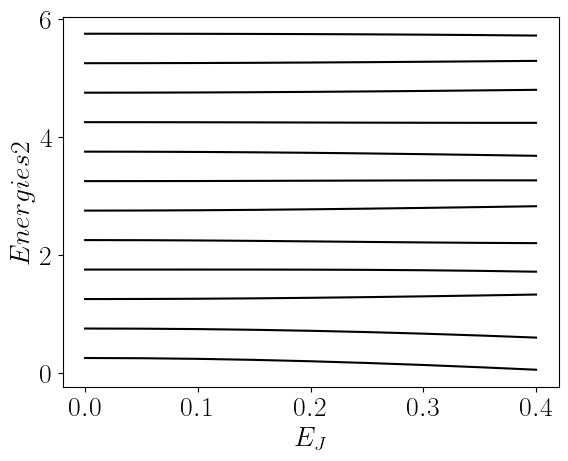

In [10]:
#Plot 2

plt.plot(E_J_2,Energies2EJ,c="k")
#plt.ylim(0.1,1.6)
#plt.xlim(-0.02,0.42)
plt.xlabel('$E_J$')
plt.ylabel('$Energies2$')
#plt.savefig('PHI_Energies2_vs_EJ_N30_k12.pdf')
plt.show()

In [11]:
#Calculations 2 

for phi2 in phi_ext:
    print("Step for phi_ext = ",phi2)
    H2=Hamiltonian_0pi(E_J_2_value,E_Cj_2,E_L_2,phi2,alpha2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2,vects2=np.linalg.eigh(H2)
    vals2phi, _ = eigsh(H2, k=4, which='SA')
    print(vals2phi[0],vals2phi[1],vals2phi[2],vals2phi[3])
    print("Eigenvalues calculated")
    Energies2phi.append(vals2phi)

Step for phi_ext =  2.541592653589793
Hamiltonian built, len(H)= 2601
0.1814788858973323 0.7558746192813683 1.2545245027620375 1.7108608827980392
Eigenvalues calculated
Step for phi_ext =  3.141592653589793
Hamiltonian built, len(H)= 2601
0.19495356918395615 0.7116682066472355 1.2711361398555552 1.7485775224528124
Eigenvalues calculated
Step for phi_ext =  3.741592653589793
Hamiltonian built, len(H)= 2601
0.20998605173757243 0.6695298527121538 1.2842828055490016 1.7856551531891145
Eigenvalues calculated


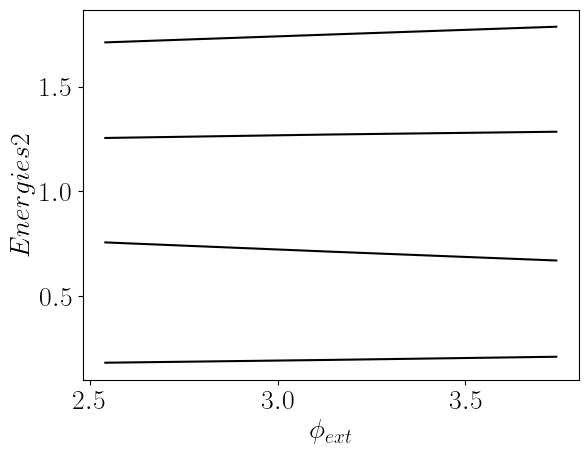

In [12]:
#Plot 2 

plt.plot(phi_ext,Energies2phi,c="k")
#plt.ylim(0.17,0.62)
plt.xlabel('$\phi_{ext}$')
plt.ylabel('$Energies2$')
#plt.savefig('PHI_Energies2_vs_phiext_N2000_INTNO2.pdf')
plt.show()

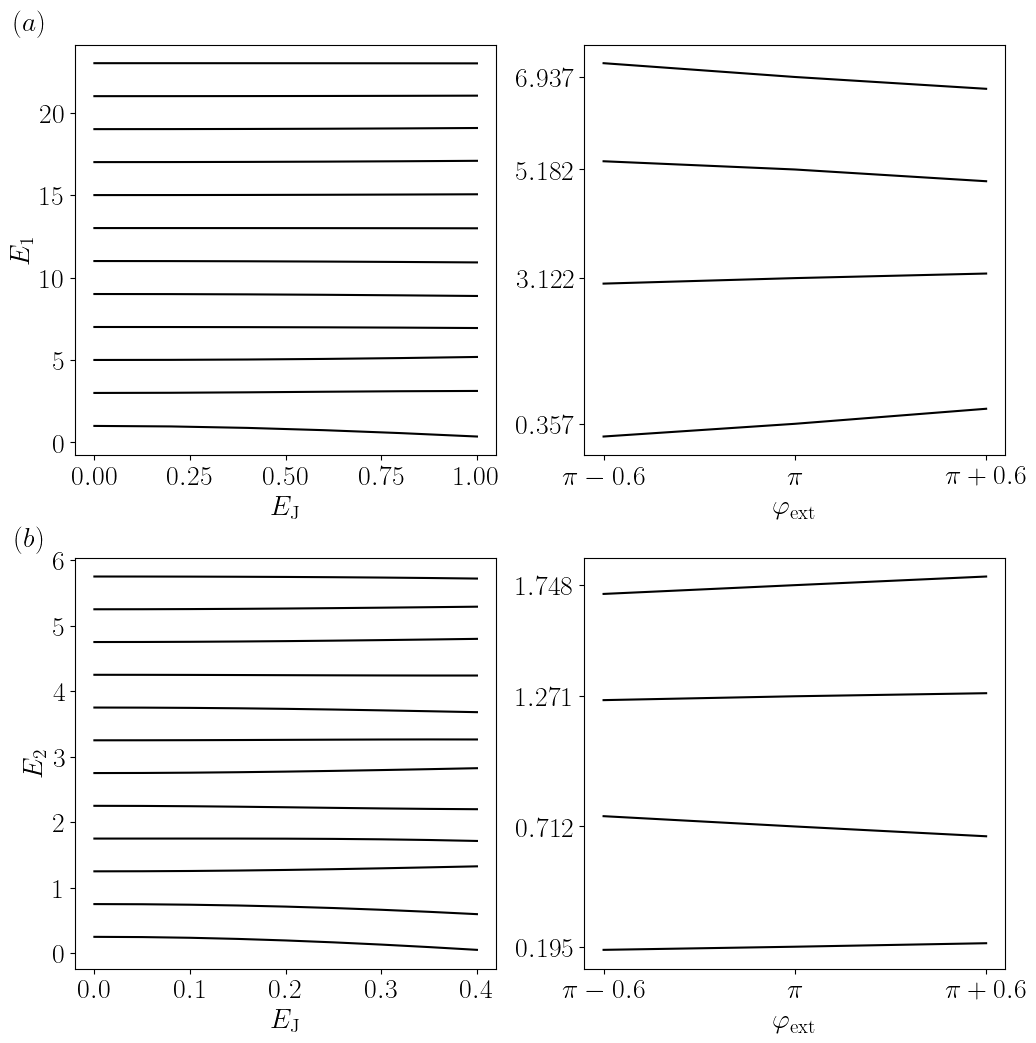

In [25]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 1
ax1 = fig.add_subplot(221)
ax1.plot(E_J, EnergiesEJ, c="k")
ax1.set_xlabel(r'$E_{\rm J}$')
ax1.set_ylabel(r'$E_1$')
ax1.text(-0.21,25,r'$(a)$', fontsize=20)

# Plot 2
ax2 = fig.add_subplot(222)
ax2.plot(phi_ext, Energiesphi, c="k")
ax2.set_xlabel(r'$\varphi_{\rm ext}$')
#ax2.set_ylabel('$E (1)$')
ax2.set_yticks([0.35727193426868104,3.1215308266399977,5.182354768150071,6.937358191459712])
ax2.set_yticklabels([r"$0.357$",r"$3.122$",r"$5.182$",r"$6.937$"])
ax2.set_xticks([np.pi-0.6, np.pi, np.pi+0.6])
ax2.set_xticklabels([r"$\pi-0.6$", r"$\pi$", r"$\pi+0.6$"])
#ax2.text(np.pi-1.0,7.8,r'$(b)$', fontsize=20)

# Plot 3
ax3 = fig.add_subplot(223)
ax3.plot(E_J_2, Energies2EJ, c="k")
ax3.set_xlabel(r'$E_{\rm J}$')
ax3.set_ylabel(r'$E_2$')
ax3.text(-0.083,6.2,r'$(b)$', fontsize=20)

# Plot 4
ax4 = fig.add_subplot(224)
ax4.plot(phi_ext, Energies2phi, c="k")
ax4.set_xlabel(r'$\varphi_{\rm ext}$')
#ax4.set_ylabel('$E (2)$')
ax4.set_yticks([0.19493436729927993,0.7116636705870957,1.2712220856869767,1.748607448422321])
ax4.set_yticklabels([r"$0.195$",r"$0.712$",r"$1.271$",r"$1.748$"])
ax4.set_xticks([np.pi-0.6, np.pi, np.pi+0.6])
ax4.set_xticklabels([r"$\pi-0.6$", r"$\pi$", r"$\pi+0.6$"])
#ax4.text(np.pi-1.0,1.95,r'$(d)$', fontsize=20)

# Adjust the spacing between subplots
#fig.tight_layout()
fig.subplots_adjust(wspace=0.21,hspace=0.25)

# Show the figure
#plt.savefig('PHI_Energies_vs_EJ&phi_N20_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()
